In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv(r"C:\Code Files\Data Files\creditcard.csv")

In [3]:
df.head()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df = df.drop_duplicates()
df = df.dropna()

df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])

Text(0, 0.5, 'Transaction Distribution')

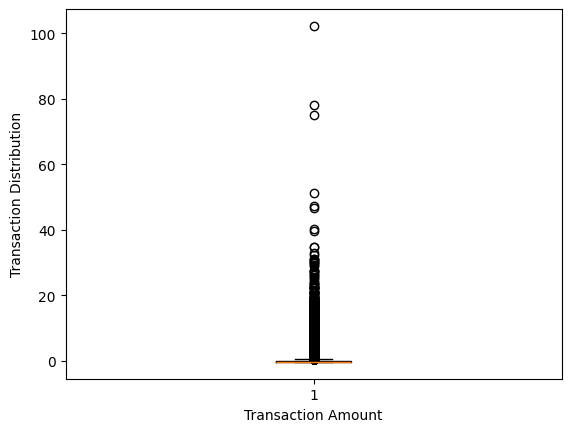

In [5]:
plt.boxplot(df['Amount'])
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Distribution")

Text(0, 0.5, 'Transaction Count')

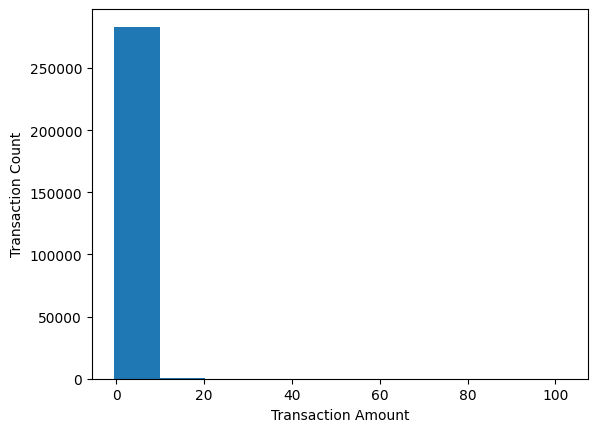

In [6]:
plt.hist(df['Amount'], bins=10)
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Count")

Unsupervised Approach

In [7]:
df_unsupervised = df.copy()

In [8]:
iso_model = IsolationForest(n_estimators=400, contamination=0.0025, random_state=42)
df_unsupervised['anomaly_score'] = iso_model.fit_predict(df_unsupervised.drop(columns=['Class']))

In [9]:
anomaly_count = (df_unsupervised['anomaly_score'] == -1).sum()
print(f'Anomaly Amount: {anomaly_count}')

Anomaly Amount: 710


In [10]:
y_true = df_unsupervised['Class']
y_pred = df_unsupervised['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

In [11]:
acc = accuracy_score(y_true, y_pred) * 100
print(f'Accuracy: {acc:.2f}%')
print(classification_report(y_true, y_pred))

Accuracy: 99.69%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.21      0.31      0.25       473

    accuracy                           1.00    283726
   macro avg       0.60      0.65      0.62    283726
weighted avg       1.00      1.00      1.00    283726



Supervised Approach

In [12]:
df_supervised = df.copy()

In [24]:
X = df_supervised.drop(columns=['Class'])
y = df_supervised['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [26]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [28]:
log_model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
log_model.fit(x_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [29]:
y_pred = log_model.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {acc:.2f}%')

Accuracy: 99.92%


In [30]:
fraud_count = (df_supervised['Class'] == 1).sum()
print(f'Anomaly Amount: {fraud_count}')

Anomaly Amount: 473


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746

